<a href="https://colab.research.google.com/github/DaiVo20/Stock-Price-Prediction/blob/main/MovingAverage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA

In [49]:
#set Dates col as index col
dataset=pd.read_csv("/content/stock_data.csv", parse_dates=['Date'], index_col=[0])


In [50]:
dataset.head()

,Open,High,Low,Close,Volume,OpenInt,Stock
Date,,,,,,,
1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL


In [51]:
#get a sub dataset containing Close and Stock col
my_data=dataset[['Close','Stock']]

In [52]:
my_data.head()

,Close,Stock
Date,,
1984-09-07,0.42388,AAPL
1984-09-10,0.42134,AAPL
1984-09-11,0.42902,AAPL
1984-09-12,0.41618,AAPL
1984-09-13,0.43927,AAPL


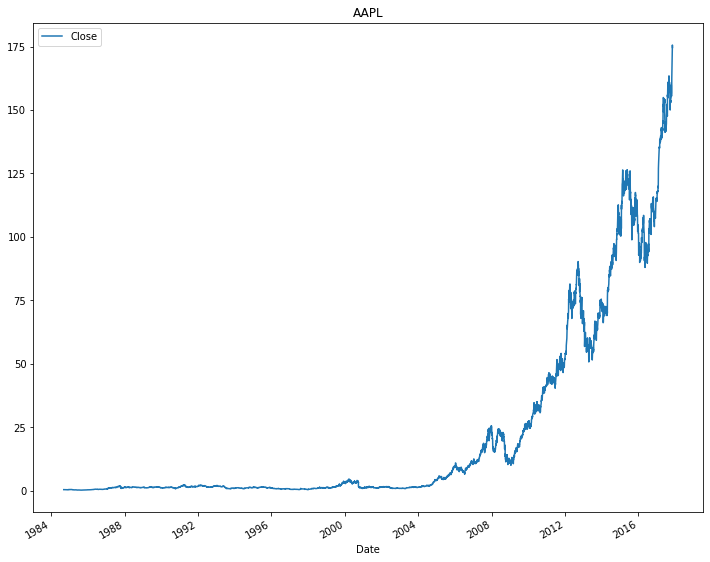

In [62]:
#Visualize Close values from past (AAPL)
my_data[my_data['Stock']=='AAPL'].plot(figsize=(12,10), title='AAPL')

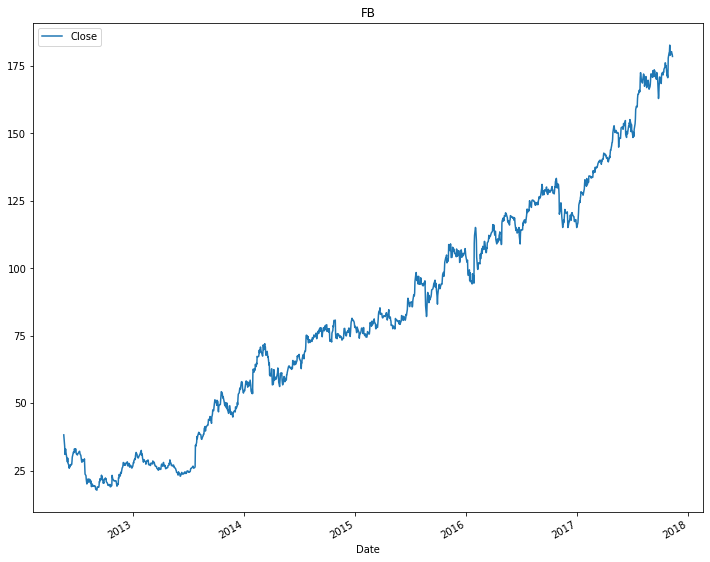

In [61]:
#Visualize Close values from past (FB)
my_data[my_data['Stock']=='FB'].plot(figsize=(12,10), title="FB")

In [63]:
#fisrt 70% data points are in training set
n=70
train_data=my_data.head(int(len(dataset)*(n/100)))

In [64]:
#the rest are in test set
m=30
test_data=my_data.tail(int(len(dataset)*(m/100)))

In [66]:
train_data

,Close,Stock
Date,,
1984-09-07,0.42388,AAPL
1984-09-10,0.42134,AAPL
1984-09-11,0.42902,AAPL
1984-09-12,0.41618,AAPL
1984-09-13,0.43927,AAPL
...,...,...
1999-12-27,44.81400,MSFT
1999-12-28,44.20200,MSFT
1999-12-29,44.36900,MSFT


In [67]:
test_data

,Close,Stock
Date,,
2000-01-04,42.373,MSFT
2000-01-05,42.818,MSFT
2000-01-06,41.386,MSFT
2000-01-07,41.921,MSFT
2000-01-10,42.230,MSFT
...,...,...
2017-11-06,180.170,FB
2017-11-07,180.250,FB
2017-11-08,179.560,FB


In [15]:
model = ARMA(train_data['Close'], order=(0,1))

In [16]:
model_fit = model.fit(disp=False)